In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report 

In [3]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 64s 0us/step


In [4]:
# Check the shape of the data
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)


In [5]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)

In [7]:
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [9]:
X_train[7]

array([[[ 28,  35,  39],
        [ 30,  34,  44],
        [ 33,  44,  47],
        ...,
        [ 43,  56,  45],
        [ 52,  64,  53],
        [ 46,  58,  47]],

       [[ 27,  30,  38],
        [ 27,  28,  41],
        [ 21,  31,  39],
        ...,
        [112, 136,  97],
        [117, 140, 101],
        [115, 138, 100]],

       [[ 34,  36,  42],
        [ 33,  33,  43],
        [ 24,  30,  40],
        ...,
        [175, 208, 143],
        [177, 209, 144],
        [176, 208, 143]],

       ...,

       [[142, 176, 118],
        [142, 176, 118],
        [150, 184, 127],
        ...,
        [134, 175, 119],
        [128, 168, 112],
        [134, 175, 119]],

       [[140, 176, 124],
        [145, 180, 129],
        [150, 186, 134],
        ...,
        [131, 170, 119],
        [130, 170, 119],
        [122, 162, 111]],

       [[134, 171, 123],
        [136, 171, 124],
        [136, 171, 124],
        ...,
        [106, 144, 100],
        [104, 142,  99],
        [101, 140,  96]]

In [10]:
Y_test[:4]

array([3, 8, 8, 0], dtype=uint8)

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
classes[9]

'truck'

In [13]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

In [14]:
X_train[3]

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]

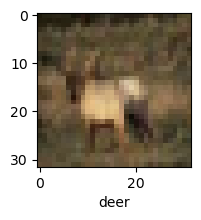

In [15]:
plot_sample(X_train, Y_train, 3)

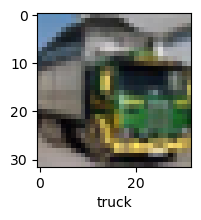

In [16]:
plot_sample(X_train, Y_train, 14)

# # Normalize pixel values to be between 0 and 1

In [17]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [18]:
X_train[3]

array([[[0.10980392, 0.09803922, 0.03921569],
        [0.14509804, 0.13333333, 0.0745098 ],
        [0.14901961, 0.1372549 , 0.07843137],
        ...,
        [0.29803922, 0.2627451 , 0.15294118],
        [0.31764706, 0.28235294, 0.16862745],
        [0.33333333, 0.29803922, 0.18431373]],

       [[0.12941176, 0.10980392, 0.05098039],
        [0.13333333, 0.11764706, 0.05490196],
        [0.1254902 , 0.10588235, 0.04705882],
        ...,
        [0.37254902, 0.32156863, 0.21568627],
        [0.37647059, 0.32156863, 0.21960784],
        [0.33333333, 0.28235294, 0.17647059]],

       [[0.15294118, 0.1254902 , 0.05882353],
        [0.15686275, 0.12941176, 0.06666667],
        [0.22352941, 0.19607843, 0.12941176],
        ...,
        [0.36470588, 0.29803922, 0.20392157],
        [0.41960784, 0.34901961, 0.25882353],
        [0.37254902, 0.30196078, 0.21176471]],

       ...,

       [[0.3254902 , 0.28627451, 0.20392157],
        [0.34117647, 0.30196078, 0.21960784],
        [0.32941176, 0

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening 
model.add(layers.Flatten())
# Fully Connected (Dense) Layer
model.add(layers.Dense(64, activation='relu'))
# Output Layer with 10 classes (for CIFAR-10)
model.add(layers.Dense(10, activation='softmax'))

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 28s 19ms/step - loss: 1.5388 - accuracy: 0.4363 - val_loss: 1.2702 - val_accuracy: 0.5370
Epoch 2/10
1407/1407 [==============================] - 28s 20ms/step - loss: 1.1661 - accuracy: 0.5851 - val_loss: 1.0911 - val_accuracy: 0.6244
Epoch 3/10
1407/1407 [==============================] - 28s 20ms/step - loss: 1.0060 - accuracy: 0.6476 - val_loss: 0.9695 - val_accuracy: 0.6724
Epoch 4/10
1407/1407 [==============================] - 28s 20ms/step - loss: 0.8991 - accuracy: 0.6845 - val_loss: 0.9174 - val_accuracy: 0.6824
Epoch 5/10
1407/1407 [==============================] - 29s 20ms/step - loss: 0.8141 - accuracy: 0.7191 - val_loss: 0.8409 - val_accuracy: 0.7064
Epoch 6/10
1407/1407 [==============================] - 26s 19ms/step - loss: 0.7477 - accuracy: 0.7416 - val_loss: 0.8495 - val_accuracy: 0.7088
Epoch 7/10
1407/1407 [==============================] - 37s 26ms/step - loss: 0.6945 - accuracy: 0.7602 - val_loss: 0.8346 -

In [23]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=2)

# Print the results
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')


313/313 - 3s - loss: 0.9391 - accuracy: 0.7021 - 3s/epoch - 8ms/step
Test accuracy: 0.7021
Test loss: 0.9391


In [29]:
# Predict the classes for the test data
predictions = model.predict(X_test)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


313/313 [==============================] - 3s 10ms/step


In [32]:
print(classification_report(Y_test, predicted_classes, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.70      0.77      0.73      1000
  automobile       0.74      0.89      0.81      1000
        bird       0.73      0.43      0.54      1000
         cat       0.58      0.45      0.51      1000
        deer       0.67      0.65      0.66      1000
         dog       0.62      0.63      0.63      1000
        frog       0.62      0.89      0.73      1000
       horse       0.78      0.71      0.74      1000
        ship       0.78      0.84      0.80      1000
       truck       0.81      0.75      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



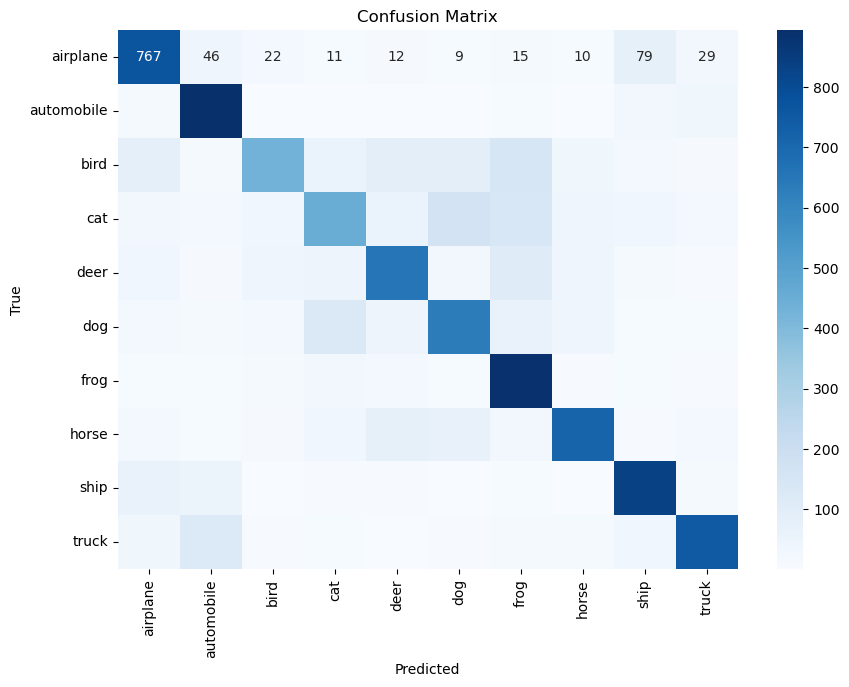

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
